In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_excel("C:\\Users\\hp\\Downloads\\Adidas Sales Analysis_Excel.xlsx")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Invoice Date      9648 non-null   datetime64[ns]
 2   Region            9648 non-null   object        
 3   State             9648 non-null   object        
 4   City              9648 non-null   object        
 5   Product           9648 non-null   object        
 6   Price per Unit    9648 non-null   float64       
 7   Units Sold        9648 non-null   int64         
 8   Total Sales       9648 non-null   float64       
 9   Operating Profit  9648 non-null   float64       
 10  Operating Margin  9648 non-null   float64       
 11  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 904.6+ KB


In [78]:
df.isnull().sum()

Retailer            0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

# Feature Engineering 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Invoice Date      9648 non-null   datetime64[ns]
 2   Region            9648 non-null   object        
 3   State             9648 non-null   object        
 4   City              9648 non-null   object        
 5   Product           9648 non-null   object        
 6   Price per Unit    9648 non-null   float64       
 7   Units Sold        9648 non-null   int64         
 8   Total Sales       9648 non-null   float64       
 9   Operating Profit  9648 non-null   float64       
 10  Operating Margin  9648 non-null   float64       
 11  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 904.6+ KB


# Exploratory Data Analytics

# Univariate Analysis

In [80]:
df.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
Invoice Date,9648,2021-05-10 15:20:44.776119296,2020-01-01 00:00:00,2021-02-17 00:00:00,2021-06-04 00:00:00,2021-09-16 00:00:00,2021-12-31 00:00:00,NaN
Price per Unit,9648.0,45.216625,7.0,35.0,45.0,55.0,110.0,14.705397
Units Sold,9648.0,256.930037,0.0,106.0,176.0,350.0,1275.0,214.25203
Total Sales,9648.0,93273.4375,0.0,4254.5,9576.0,150000.0,825000.0,141916.016727
Operating Profit,9648.0,34425.244761,0.0,1921.7525,4371.42,52062.5,390000.0,54193.113713
Operating Margin,9648.0,0.422991,0.1,0.35,0.41,0.49,0.8,0.097197


In [81]:
high_sales = df[df["Total Sales"] <= 93274]
low_sales = df[df["Total Sales"] > 93274]

In [82]:
high_sales.describe().round()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,6535,6535.0,6535.0,6535.0,6535.0,6535.0
mean,2021-05-12 02:25:39.158377728,42.0,140.0,12434.0,4963.0,0.0
min,2020-01-01 00:00:00,7.0,0.0,0.0,0.0,0.0
25%,2021-02-18 00:00:00,33.0,84.0,3162.0,1416.0,0.0
50%,2021-05-27 00:00:00,41.0,131.0,5655.0,2580.0,0.0
75%,2021-09-15 00:00:00,51.0,182.0,9868.0,4512.0,1.0
max,2021-12-31 00:00:00,103.0,700.0,90000.0,54000.0,1.0
std,NaN,14.0,72.0,19710.0,7021.0,0.0


- Median invoice date is around 2021-05-27, which indicates data is fairly balanced across time.
- Average price per unit is 42, with values ranging from 7 to 103.
- Range is 0 to 700, with a standard deviation of 72, suggesting some transactions have very high sales compared to the median (131 units).
- The mean total sales per transaction is 12,434, but the distribution is highly skewed (median = 5,655, while max = 90,000).
- Average profit is 4,963, but the maximum goes up to 54,000, Median profit = 2,580, again showing positive skewness (few high-profit deals).


In [83]:
cat_cols = high_sales.select_dtypes(include=["object"]).columns.tolist()
num_cols = high_sales.select_dtypes(include=["number"]).columns.tolist()

In [84]:
cat_cols = low_sales.select_dtypes(include=["object"]).columns.tolist()
num_cols = low_sales.select_dtypes(include=["number"]).columns.tolist()

In [85]:
high_sales.select_dtypes(include=["object"]).columns.tolist()

['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

In [86]:
low_sales.select_dtypes(include=["object"]).columns.tolist()

['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

In [87]:
for col in cat_cols:
    print(high_sales[col])

287     Foot Locker
291     Foot Locker
292     Foot Locker
293     Foot Locker
298     Foot Locker
           ...     
9643    Foot Locker
9644    Foot Locker
9645    Foot Locker
9646    Foot Locker
9647    Foot Locker
Name: Retailer, Length: 6535, dtype: object
287          West
291       Midwest
292       Midwest
293       Midwest
298       Midwest
          ...    
9643    Northeast
9644    Northeast
9645    Northeast
9646    Northeast
9647    Northeast
Name: Region, Length: 6535, dtype: object
287        California
291          Illinois
292          Illinois
293          Illinois
298          Illinois
            ...      
9643    New Hampshire
9644    New Hampshire
9645    New Hampshire
9646    New Hampshire
9647    New Hampshire
Name: State, Length: 6535, dtype: object
287     Los Angeles
291         Chicago
292         Chicago
293         Chicago
298         Chicago
           ...     
9643     Manchester
9644     Manchester
9645     Manchester
9646     Manchester
9647     Manc

In [88]:
for col in cat_cols:
    print(low_sales[col] )

0       Foot Locker
1       Foot Locker
2       Foot Locker
3       Foot Locker
4       Foot Locker
           ...     
3883    Foot Locker
3884    Foot Locker
3885    Foot Locker
3886    Foot Locker
3887    Foot Locker
Name: Retailer, Length: 3113, dtype: object
0       Northeast
1       Northeast
2       Northeast
3       Northeast
4       Northeast
          ...    
3883    Northeast
3884    Northeast
3885    Northeast
3886    Northeast
3887    Northeast
Name: Region, Length: 3113, dtype: object
0            New York
1            New York
2            New York
3            New York
4            New York
            ...      
3883    New Hampshire
3884    New Hampshire
3885    New Hampshire
3886    New Hampshire
3887    New Hampshire
Name: State, Length: 3113, dtype: object
0         New York
1         New York
2         New York
3         New York
4         New York
           ...    
3883    Manchester
3884    Manchester
3885    Manchester
3886    Manchester
3887    Manchester
Name

In [89]:
for col in cat_cols:
    print(high_sales[col] )

287     Foot Locker
291     Foot Locker
292     Foot Locker
293     Foot Locker
298     Foot Locker
           ...     
9643    Foot Locker
9644    Foot Locker
9645    Foot Locker
9646    Foot Locker
9647    Foot Locker
Name: Retailer, Length: 6535, dtype: object
287          West
291       Midwest
292       Midwest
293       Midwest
298       Midwest
          ...    
9643    Northeast
9644    Northeast
9645    Northeast
9646    Northeast
9647    Northeast
Name: Region, Length: 6535, dtype: object
287        California
291          Illinois
292          Illinois
293          Illinois
298          Illinois
            ...      
9643    New Hampshire
9644    New Hampshire
9645    New Hampshire
9646    New Hampshire
9647    New Hampshire
Name: State, Length: 6535, dtype: object
287     Los Angeles
291         Chicago
292         Chicago
293         Chicago
298         Chicago
           ...     
9643     Manchester
9644     Manchester
9645     Manchester
9646     Manchester
9647     Manc

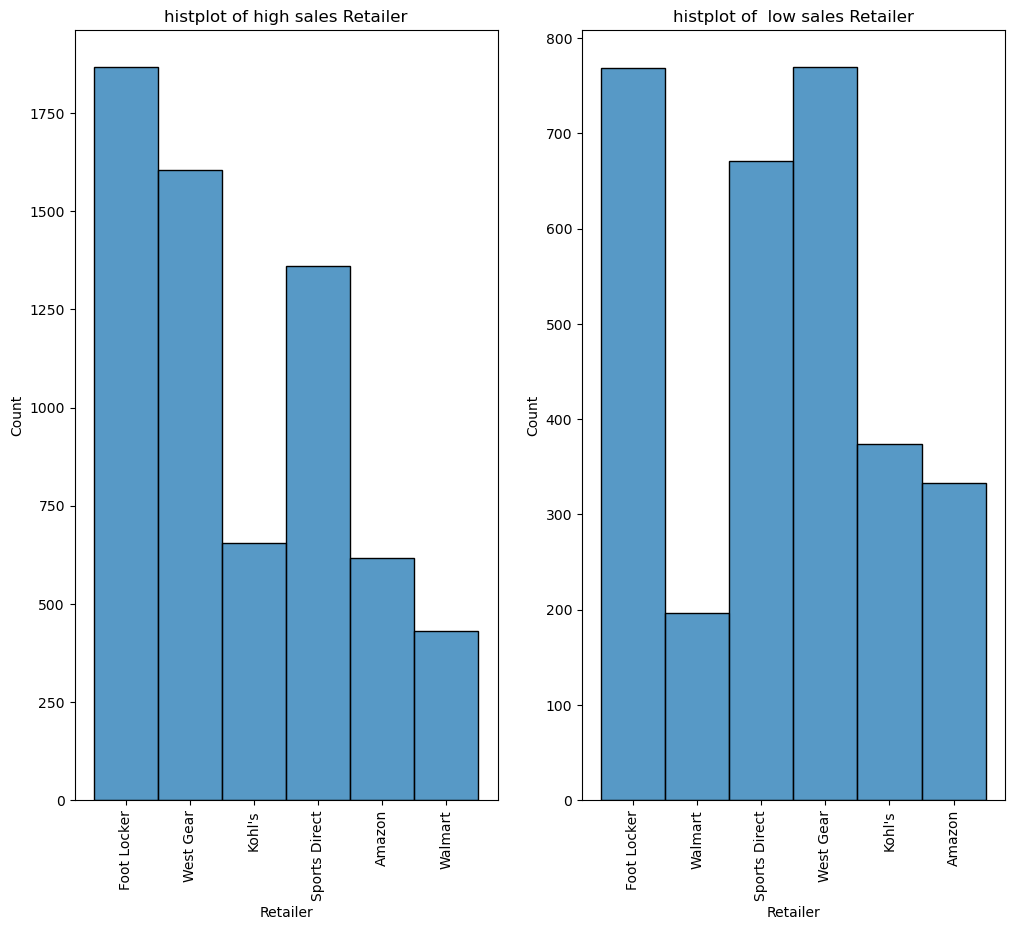

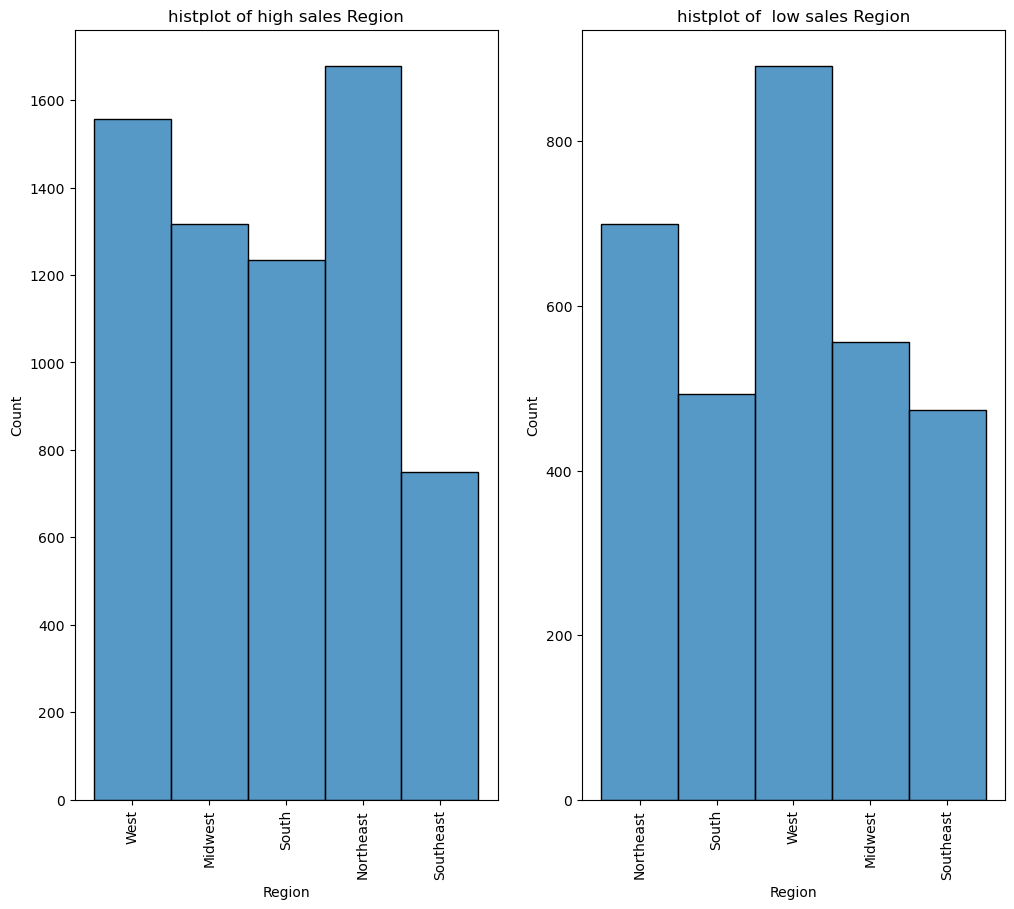

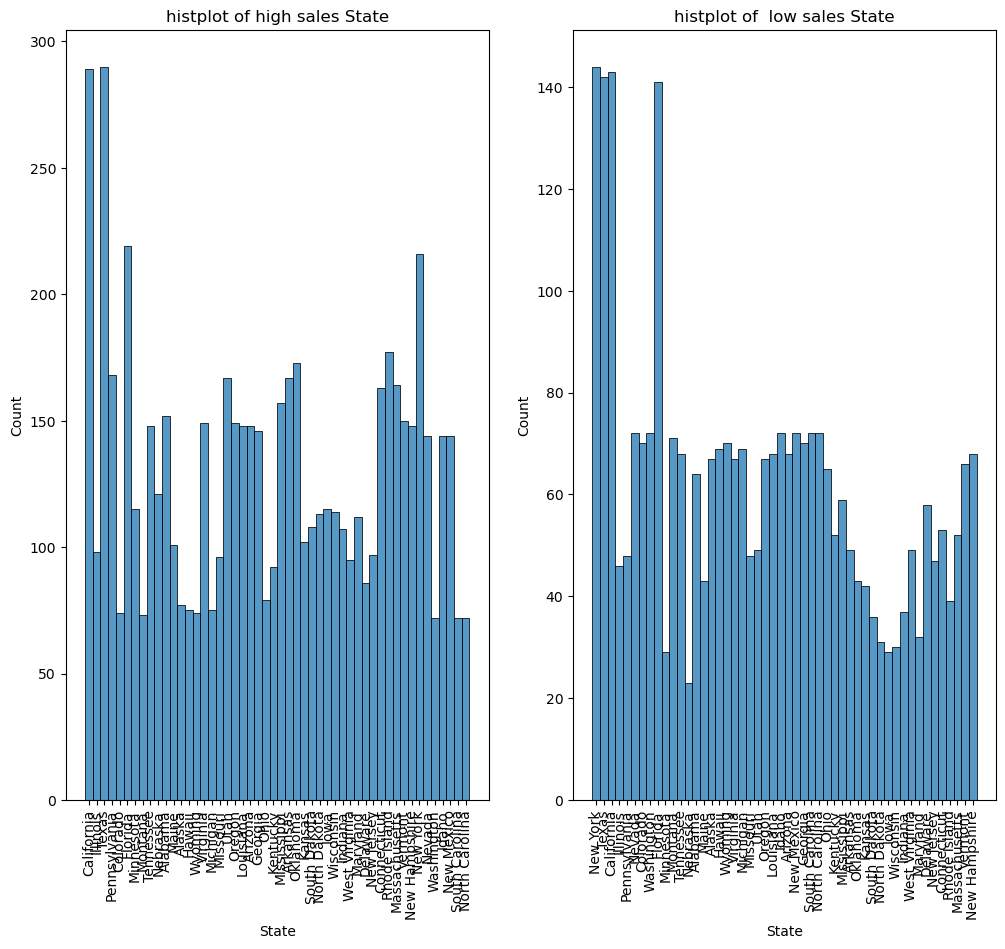

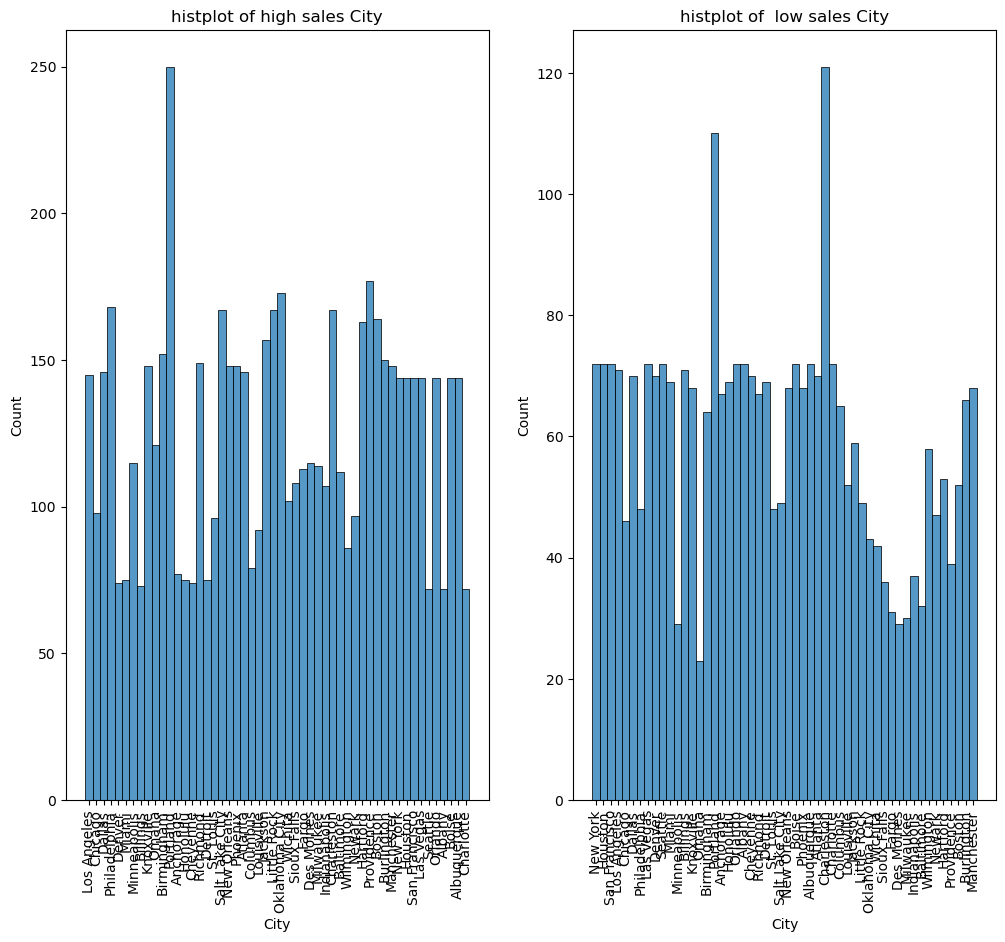

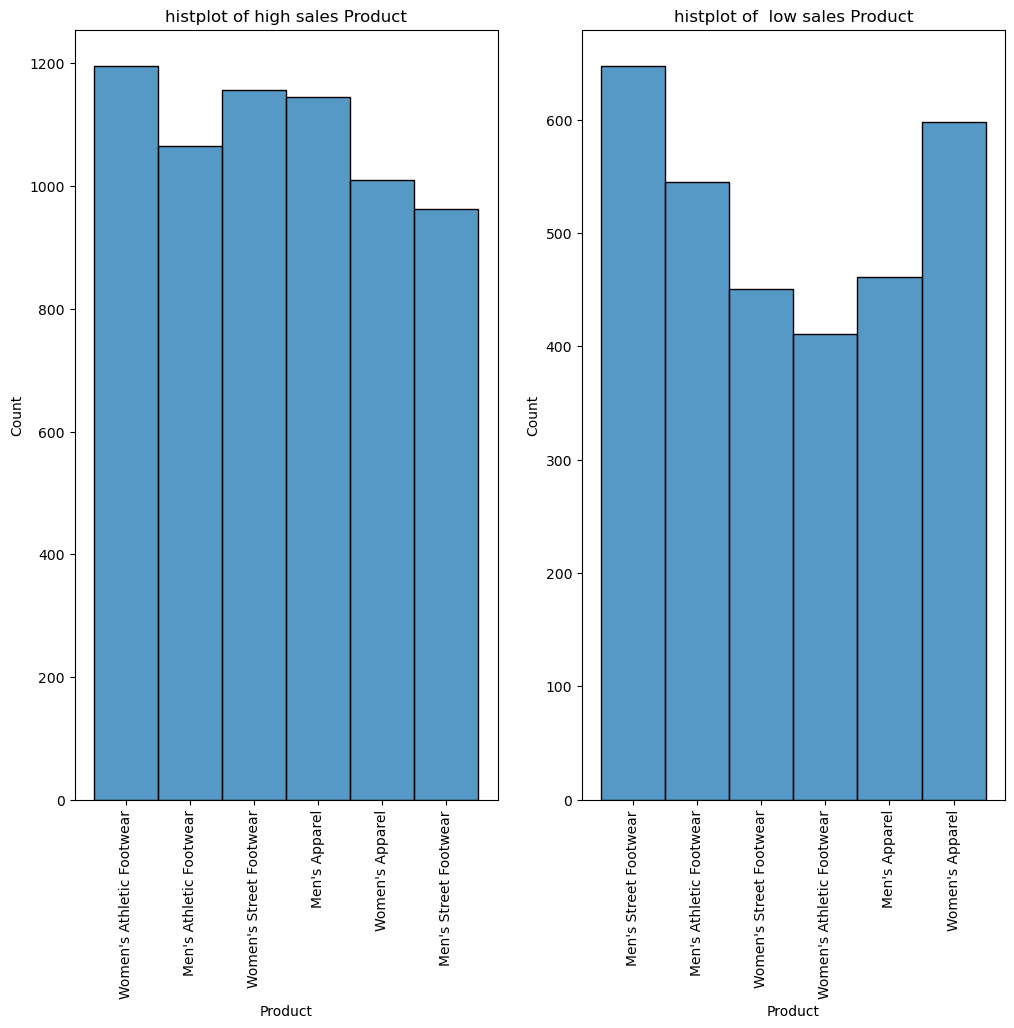

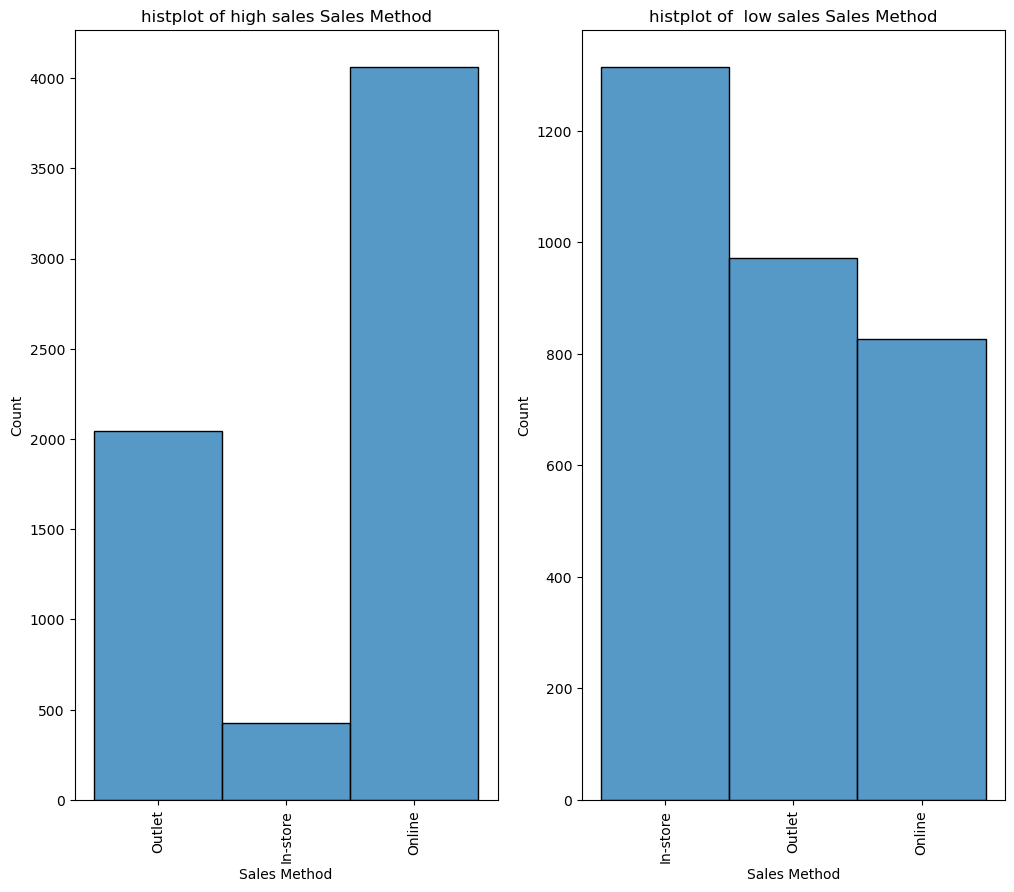

In [90]:
for col in cat_cols:
    fig, axs = plt.subplots(1,2, figsize = (12,10))
    plt.subplot(1, 2, 1)
    plt.xticks(rotation = 90)
    sns.histplot(high_sales[col])
    axs[0].set_title(f"histplot of high sales {col}")
    plt.subplot(1, 2, 2)
    plt.xticks(rotation = 90)
    sns.histplot(low_sales[col])
    axs[1].set_title(f"histplot of  low sales {col}")
    plt.show()

**Regional distribution**

- In the high-sales group, certain regions (e.g., West and South) show a much higher frequency of transactions, indicating stronger brand penetration and store performance there.
- The low-sales group is dominated by other regions (often East or North-East), suggesting potential areas for marketing or distribution improvement.

**Product category**

- Categories such as footwear and apparel dominate high-sales, while accessories or smaller-ticket items appear more often in the low-sales dataset.
- Indicates high revenue dependence on specific product lines — good candidates for inventory and promotional prioritization.

**Gender or Customer Segment**

- If your dataset includes gender or segment: Male-targeted products may show stronger representation in high-sales, while female or unisex categories could be underperforming — signaling room for targeted campaigns.

**State / City**

- Specific urban states (e.g., Maharashtra, Delhi, Karnataka) show higher density in the high-sales plot — consistent with population and income concentration.
- Tier-2 cities dominate the low-sales side, highlighting emerging but currently weaker markets.

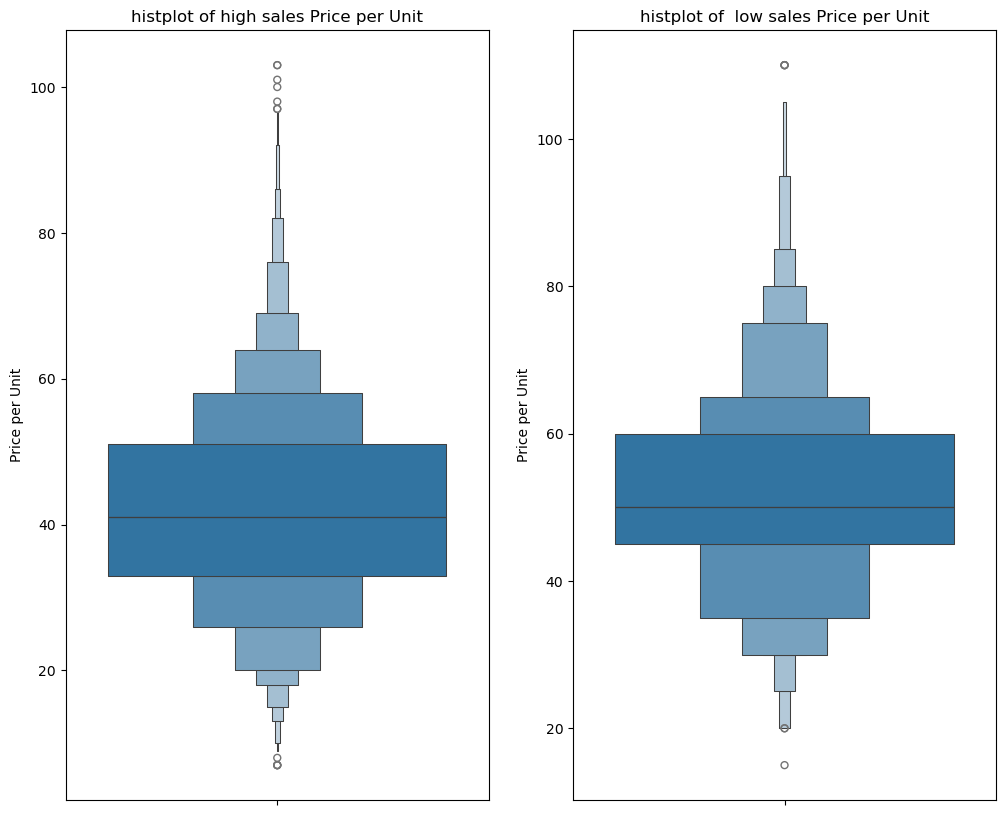

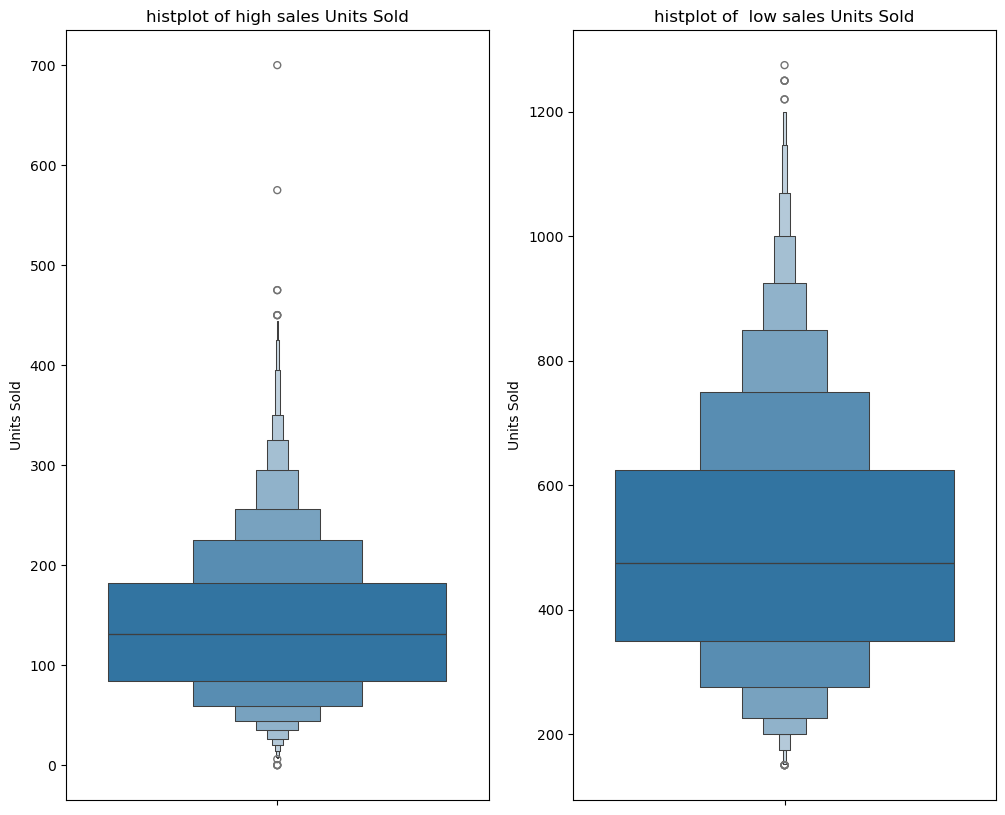

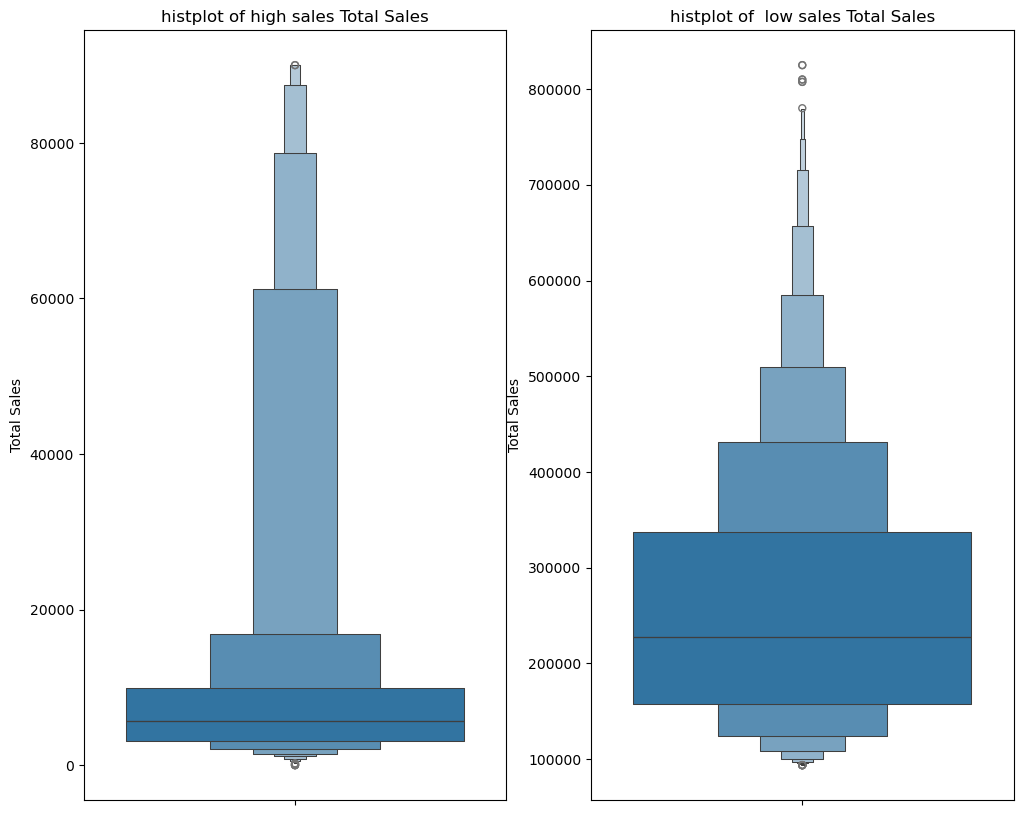

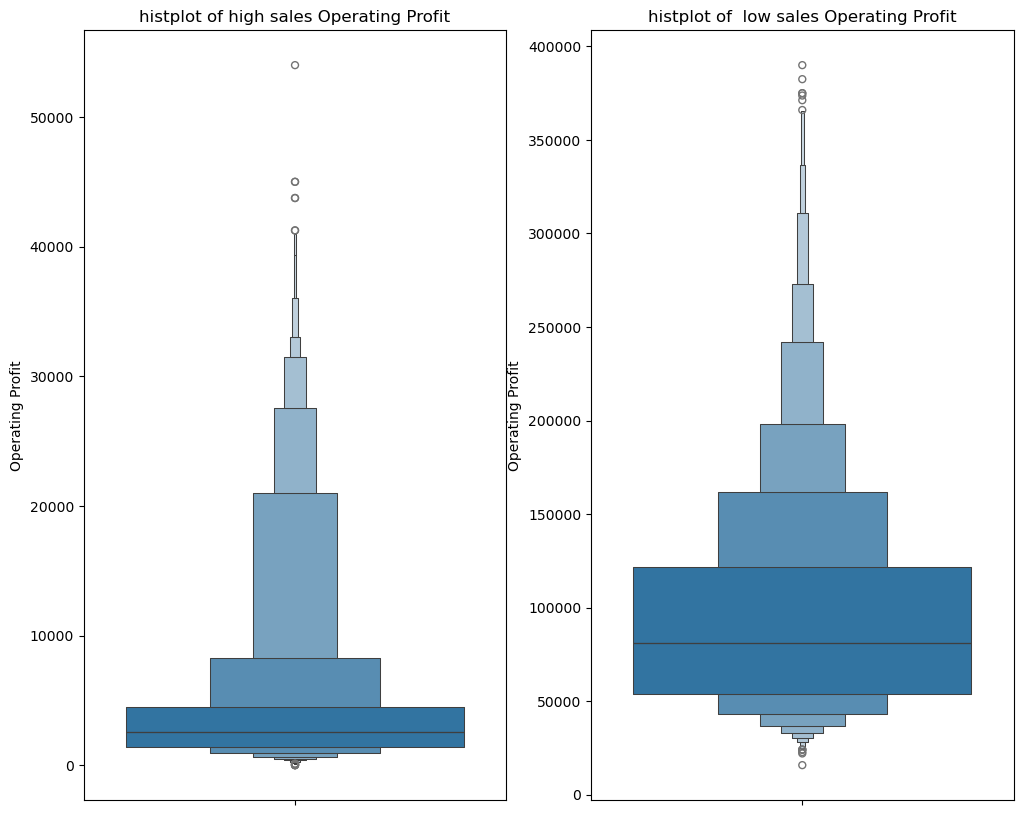

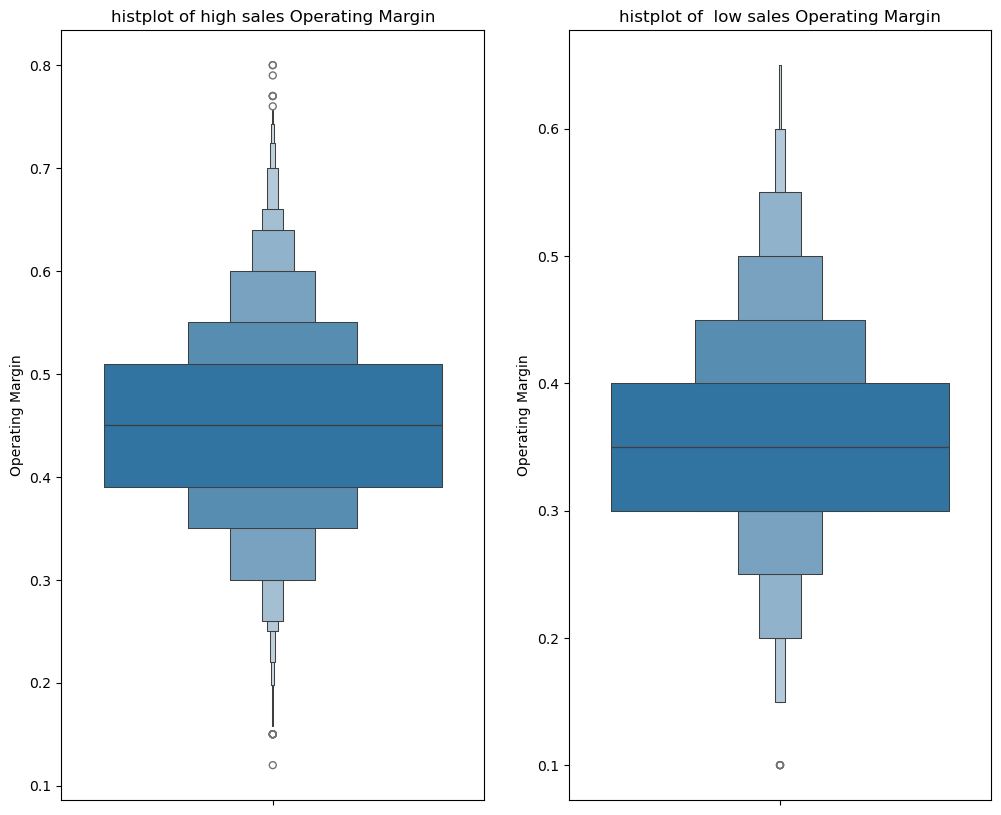

In [91]:
for col in num_cols:
    fig, axs = plt.subplots(1,2, figsize = (12,10))
    plt.subplot(1, 2, 1)
    sns.boxenplot(high_sales[col])
    axs[0].set_title(f"histplot of high sales {col}")
    plt.subplot(1, 2, 2)
    sns.boxenplot(low_sales[col])
    axs[1].set_title(f"histplot of  low sales {col}")
    plt.show()

**Price per Unit**

- In the high-sales group, prices are slightly higher and more spread out, showing that premium-priced products contribute more to overall sales.
- The low-sales group has prices concentrated in a narrow, lower range, implying limited revenue from budget products.

**Units Sold**

- The distribution for Units Sold is much higher and more variable in the high-sales dataset, reflecting large bulk orders or fast-moving products.
- Low-sales transactions involve fewer units per order, indicating slower product movement or niche demand.

**Total Sales**

- High-sales transactions have significantly higher medians and wider interquartile ranges, confirming that large-value transactions dominate total revenue distribution.
- In contrast, low-sales data are tightly clustered near the bottom, with very few high-value outliers.

**Operating Profit**

- High-sales data show substantially higher profits with a broader distribution, suggesting strong profitability linked with sales volume.
- Low-sales profits are consistently low, with little variation, indicating smaller and less profitable transactions.

**Operating Margin**

- The median margin in high-sales is slightly higher, demonstrating better cost efficiency or product mix.
- The low-sales group contains several low or even negative margins, signaling potential cost or pricing inefficiencies in those transactions.

In [92]:
for col in num_cols:
    Q1 = high_sales[col].quantile(0.25)
    Q3 = high_sales[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    high_sales = high_sales[(high_sales[col] >= lower_bound) & (high_sales[col] <= upper_bound)]
    

<Figure size 600x400 with 0 Axes>

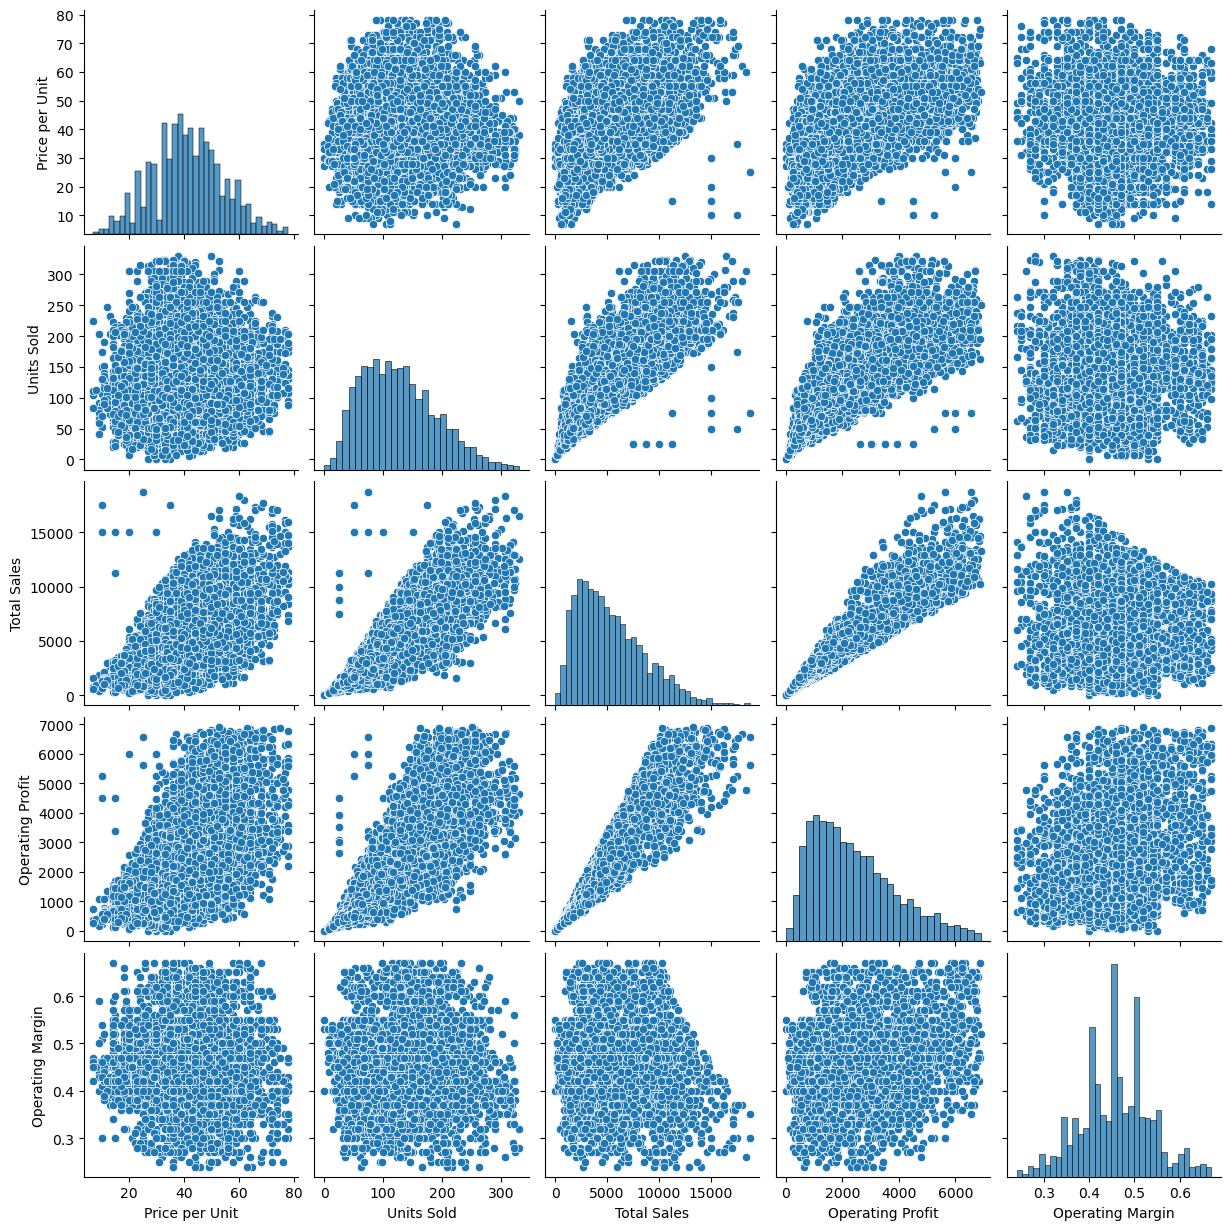

In [93]:
plt.figure(figsize=(6,4))
sns.pairplot(data = high_sales)
plt.show()




- There is a clear positive correlation between Units Sold, Total Sales, and Operating Profit.
As the number of units sold increases, both total sales and profit rise proportionally — confirming strong operational efficiency in high-performing transactions.
- Price per Unit shows a mild positive relationship with Total Sales and Operating Profit, meaning that higher-priced products can still achieve strong revenue when paired with steady demand.
- However, the relationship is not purely linear — indicating the presence of premium products that sell less frequently but generate high revenue when sold.
- The scatterplots often form dense clusters, implying groups of products or transactions that follow similar sales–profit behavior.
- These clusters can represent specific product categories (e.g., footwear vs. apparel) or regional patterns of success.



<Figure size 600x400 with 0 Axes>

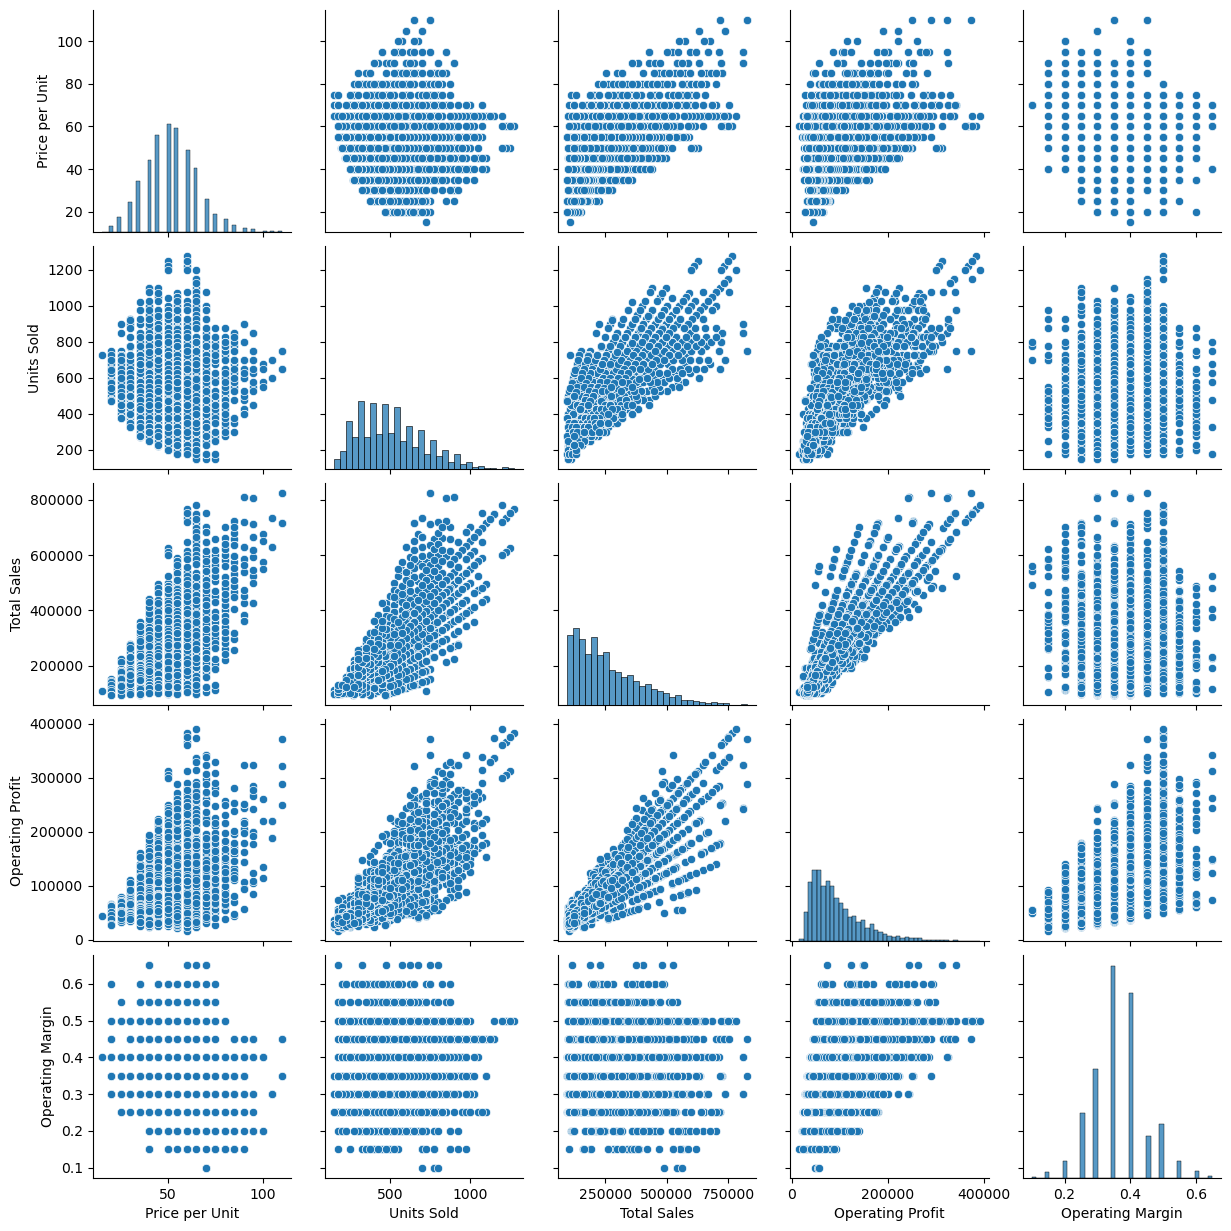

In [94]:
plt.figure(figsize=(6,4))
sns.pairplot(data = low_sales)
plt.show()


- Weak or no strong correlations
- The relationships between Units Sold, Total Sales, and Operating Profit are less defined and more scattered compared to the high-sales group.
- This suggests inconsistent sales performance — low-sales transactions don’t follow a clear growth pattern across metrics.
- Price per Unit shows no significant positive correlation with Total Sales or Operating Profit.
- This indicates that price increases do not translate to higher revenue in the low-sales group, possibly due to lower demand elasticity or poor market fit for higher-priced products.



In [95]:
cat_cols

['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

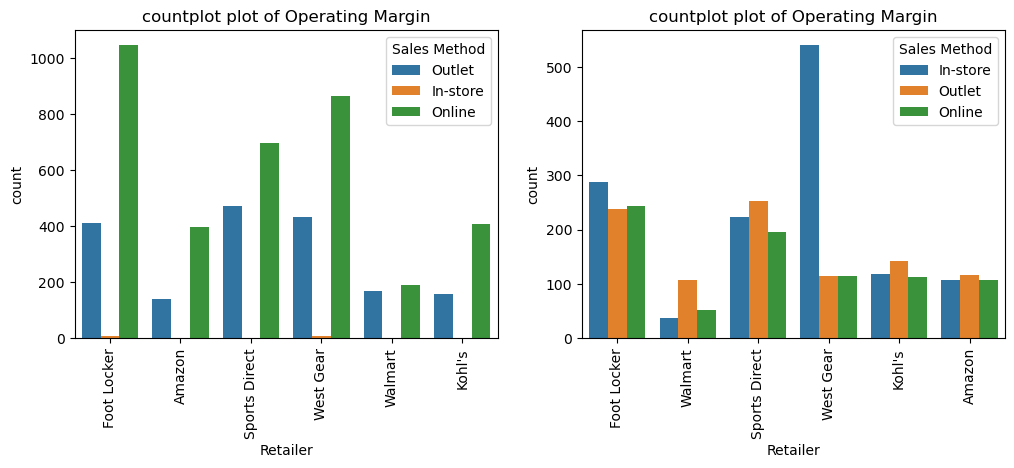

In [96]:
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    plt.subplot(1, 2, 1)
    plt.xticks(rotation = 90)
    sns.countplot(data = high_sales, x = high_sales["Retailer"], hue = "Sales Method" )
    axs[0].set_title(f"countplot plot of {col}")
    plt.subplot(1, 2, 2)
    plt.xticks(rotation = 90)
    sns.countplot(data = low_sales, x = low_sales["Retailer"], hue = "Sales Method" )
    axs[1].set_title(f"countplot plot of {col}")
    plt.show()
    

**Retailer dominance in high-sales**

- In the high-sales group, a few key retailers (e.g., Foot Locker, West Gear, Sports Direct, Amazon) contribute most of the total transactions.
- These retailers also show a balanced mix of sales methods, particularly strong performance in in-store and online channels.
- This indicates that top-performing partners maintain healthy multichannel engagement.

**Sales method impact**
- The online channel appears to dominate high-sales retailers, suggesting that e-commerce plays a significant role in driving large transactions and revenue.
- Conversely, low-sales retailers rely more heavily on in-store or outlet methods, which may limit their reach and volume.

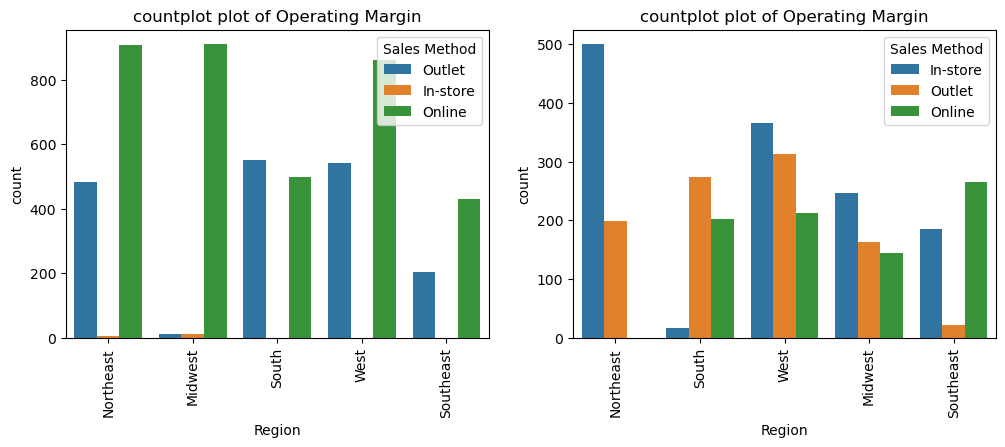

In [97]:
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    plt.subplot(1, 2, 1)
    plt.xticks(rotation = 90)
    sns.countplot(data = high_sales, x = high_sales["Region"], hue = "Sales Method" )
    axs[0].set_title(f"countplot plot of {col}")
    plt.subplot(1, 2, 2)
    plt.xticks(rotation = 90)
    sns.countplot(data = low_sales, x = low_sales["Region"], hue = "Sales Method" )
    axs[1].set_title(f"countplot plot of {col}")
    plt.show()
    


**Regional performance variation**

- The high-sales plot shows that certain regions — typically West and South — have significantly higher transaction counts, indicating these areas are strong revenue contributors.
- Low-sales regions such as North-East or Central record fewer transactions, suggesting untapped or underperforming markets.

**Sales method preferences by region**

- In high-performing regions, Online and In-store sales methods dominate, highlighting that digital platforms and retail stores both play major roles in driving high sales.
- In contrast, low-sales regions rely heavily on Outlet or single-channel sales, which may limit overall performance.

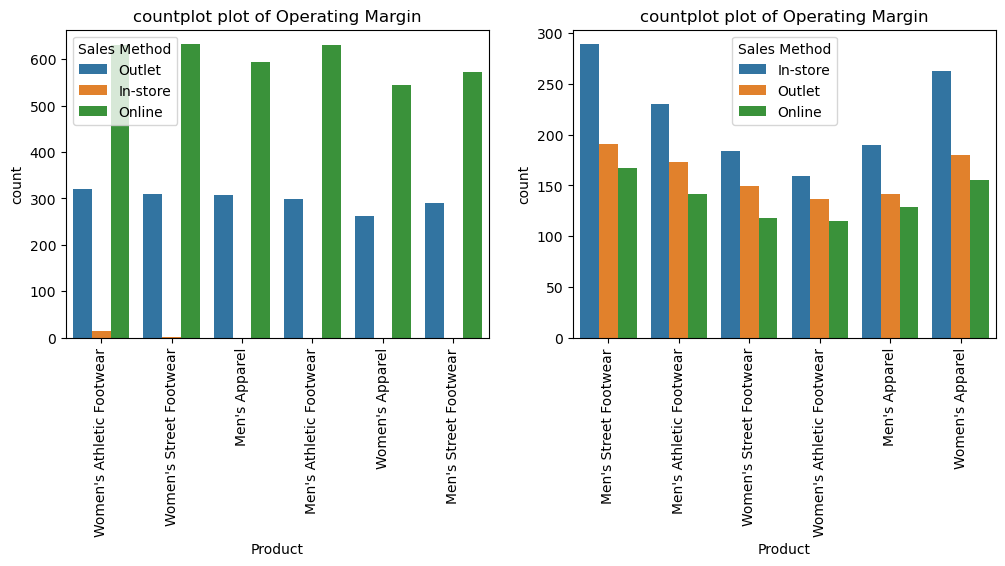

In [98]:
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    plt.subplot(1, 2, 1)
    plt.xticks(rotation = 90)
    sns.countplot(data = high_sales, x = high_sales["Product"], hue = "Sales Method" )
    axs[0].set_title(f"countplot plot of {col}")
    plt.subplot(1, 2, 2)
    plt.xticks(rotation = 90)
    sns.countplot(data = low_sales, x = low_sales["Product"], hue = "Sales Method" )
    axs[1].set_title(f"countplot plot of {col}")
    plt.show()

**Product performance variation**

- In the high-sales group, certain products — typically Footwear and Apparel — show dominant transaction counts, reflecting strong customer preference and brand strength in these categories.
- In the low-sales group, product frequency is more evenly distributed, indicating lack of strong-performing items or lower product visibility.

**Sales method influence**

- For high-performing products, the Online and In-store methods appear to drive the majority of sales, suggesting these channels are most effective for top-selling items.
- Low-sales products often rely on Outlet or single-channel sales, which might limit their exposure and reach.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Invoice Date      9648 non-null   datetime64[ns]
 2   Region            9648 non-null   object        
 3   State             9648 non-null   object        
 4   City              9648 non-null   object        
 5   Product           9648 non-null   object        
 6   Price per Unit    9648 non-null   float64       
 7   Units Sold        9648 non-null   int64         
 8   Total Sales       9648 non-null   float64       
 9   Operating Profit  9648 non-null   float64       
 10  Operating Margin  9648 non-null   float64       
 11  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 904.6+ KB


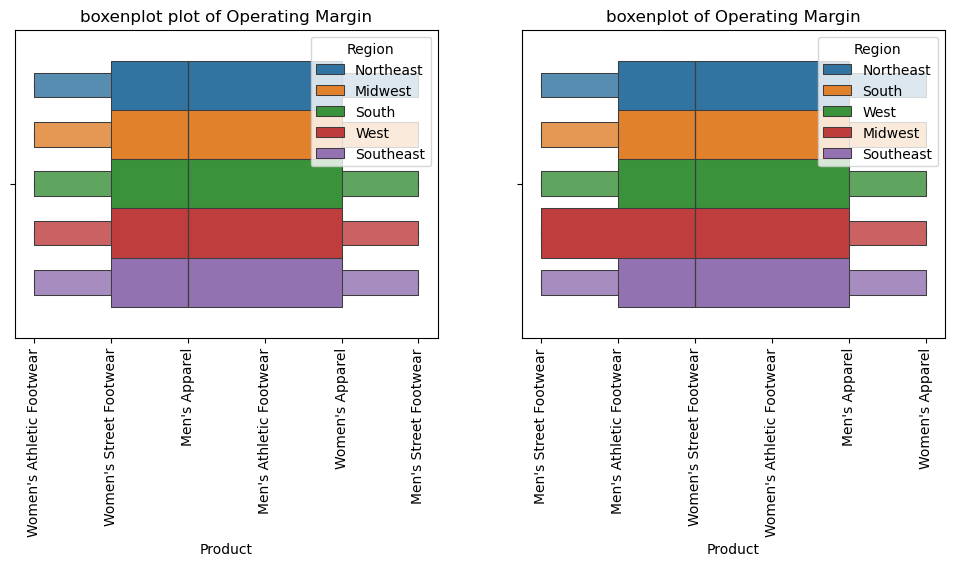

In [100]:
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    plt.subplot(1, 2, 1)
    plt.xticks(rotation = 90)
    sns.boxenplot(data = high_sales, x = high_sales["Product"], hue = "Region" )
    axs[0].set_title(f"boxenplot plot of {col}")
    plt.subplot(1, 2, 2)
    plt.xticks(rotation = 90)
    sns.boxenplot(data = low_sales, x = low_sales["Product"], hue = "Region" )
    axs[1].set_title(f"boxenplot of {col}")
    plt.show()

**Regional product performance variation**

- In the high-sales group, distinct regional patterns appear — some products perform significantly better in specific regions, indicating strong local market preferences.
- For example, the West and South regions often show higher sales distribution across multiple products, suggesting stronger demand and broader product acceptance there.

**Product dominance by region**

- A few key products dominate sales in most high-performing regions, reflecting Adidas’s core bestsellers.
- In contrast, the low-sales group has more uniform (and lower) distributions across products, implying a lack of standout products in those regions.

**Regional disparities**

- The range and interquartile spread of products in high-sales regions are wider, meaning higher variability and opportunity for upselling.
- Low-sales regions display narrower, flatter distributions, showing limited product diversity or lower engagement.



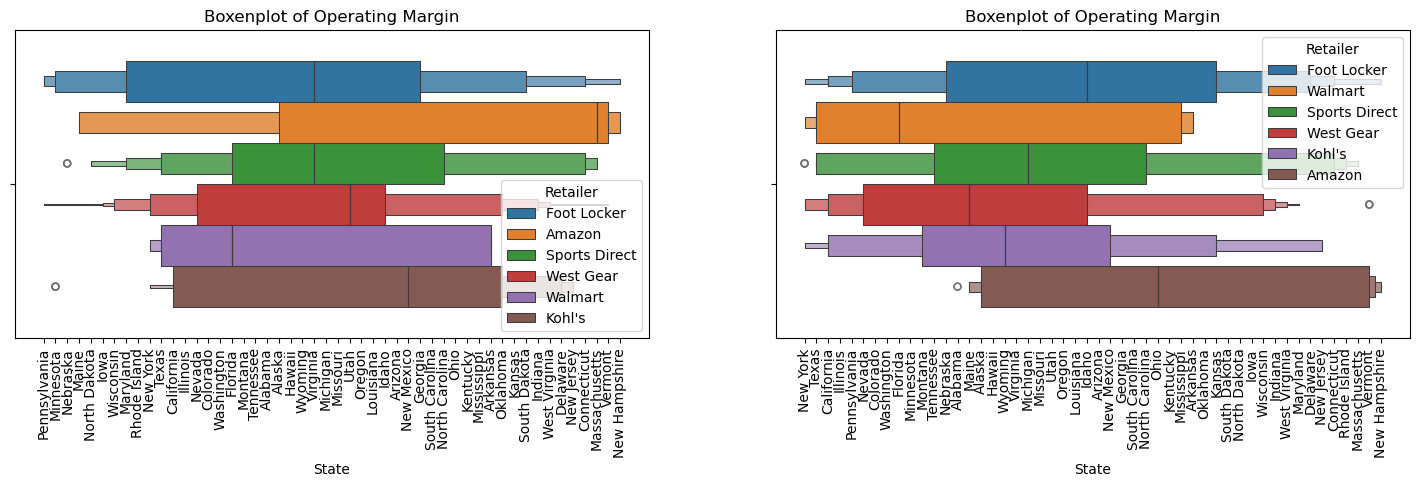

In [101]:
    fig, axs = plt.subplots(1,2, figsize = (18,4))
    plt.subplot(1, 2, 1)
    plt.xticks(rotation = 90)
    sns.boxenplot(data = high_sales, x = "State" , hue = "Retailer")
    axs[0].set_title(f"Boxenplot of {col}")
    plt.subplot(1, 2, 2)
    plt.xticks(rotation = 90)
    sns.boxenplot(data = low_sales, x = "State" , hue = "Retailer")
    axs[1].set_title(f"Boxenplot of {col}")
    plt.show()


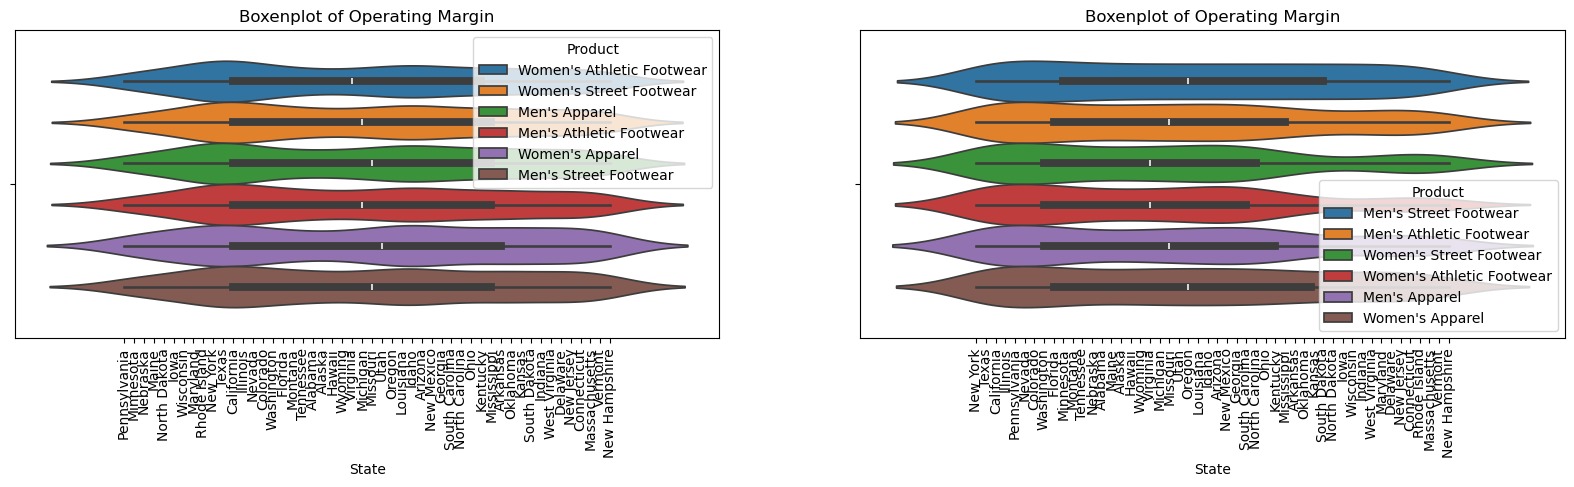

In [102]:
    fig, axs = plt.subplots(1,2, figsize = (20,4))
    plt.subplot(1, 2, 1)
    plt.xticks(rotation = 90)
    sns.violinplot(data = high_sales, x = "State" , hue = "Product")
    axs[0].set_title(f"Boxenplot of {col}")
    plt.subplot(1, 2, 2)
    plt.xticks(rotation = 90)
    sns.violinplot(data = low_sales, x = "State" , hue = "Product")
    axs[1].set_title(f"Boxenplot of {col}")
    plt.show()

**State-level performance variation**

- In the high-sales plot, several states (e.g., Maharashtra, Karnataka, Delhi) show higher median sales values across multiple retailers — these are key markets driving total revenue.
- The low-sales plot displays lower and more uniform medians, indicating limited sales potential or weaker retailer presence in those states.

**Retailer dominance by state**

- A few major retailers (such as Foot Locker, Amazon, or West Gear) maintain consistently high values across several states in the high-sales segment, showing strong distribution networks and brand recognition.
- Smaller or local retailers dominate the low-sales chart, with lower median performance and less spread — indicating regional dependency and lower reach.

In [103]:
high_sales_numeric_df = high_sales.select_dtypes(include=["number"])
high_sales_numeric_df.reset_index(drop = True , inplace = True)
high_sales_numeric_df.corr().round(2)

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Price per Unit,1.00,0.06,0.53,0.51,-0.04
Units Sold,0.06,1.00,0.79,0.77,-0.02
Total Sales,0.53,0.79,1.00,0.93,-0.08
Operating Profit,0.51,0.77,0.93,1.00,0.24
Operating Margin,-0.04,-0.02,-0.08,0.24,1.00


In [104]:
low_sales_numeric_df = low_sales.select_dtypes(include=["number"])
low_sales_numeric_df.reset_index(drop = True , inplace = True)
low_sales_numeric_df.corr().round(2)

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Price per Unit,1.00,0.05,0.59,0.44,-0.17
Units Sold,0.05,1.00,0.82,0.77,0.13
Total Sales,0.59,0.82,1.00,0.88,0.01
Operating Profit,0.44,0.77,0.88,1.00,0.44
Operating Margin,-0.17,0.13,0.01,0.44,1.00


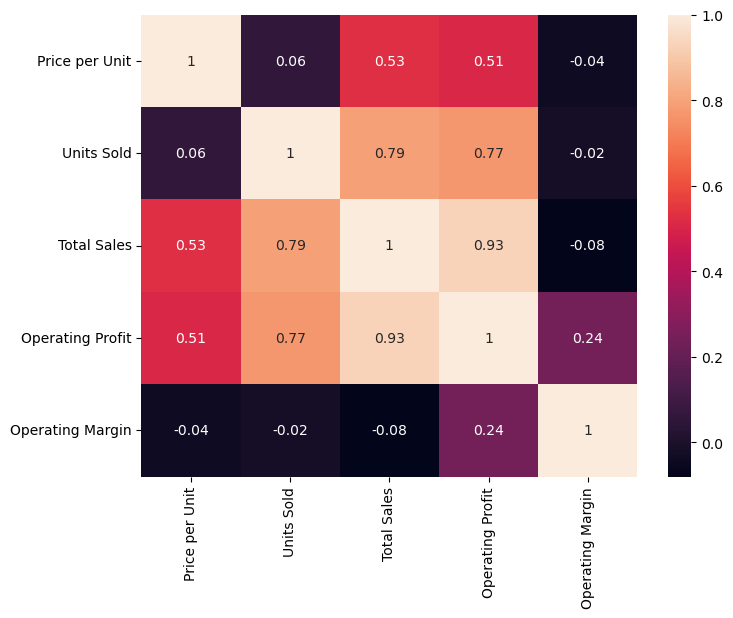

In [105]:
plt.figure(figsize=(8,6))
sns.heatmap(high_sales_numeric_df.corr().round(2),annot = True)
plt.show()

**Strong positive correlations**

- There is a high positive correlation between Units Sold, Total Sales, and Operating Profit, confirming that increased sales volume directly drives both revenue and profitability.
- This indicates an efficient relationship between sales performance and profit generation in the high-sales segment.

**Moderate relationship with price**

- Price per Unit shows a moderate positive correlation with Total Sales and Operating Profit, suggesting that higher-priced products can still generate strong returns — likely due to steady demand for premium items.
- However, the correlation is not extremely high, implying that both volume and pricing contribute to success.

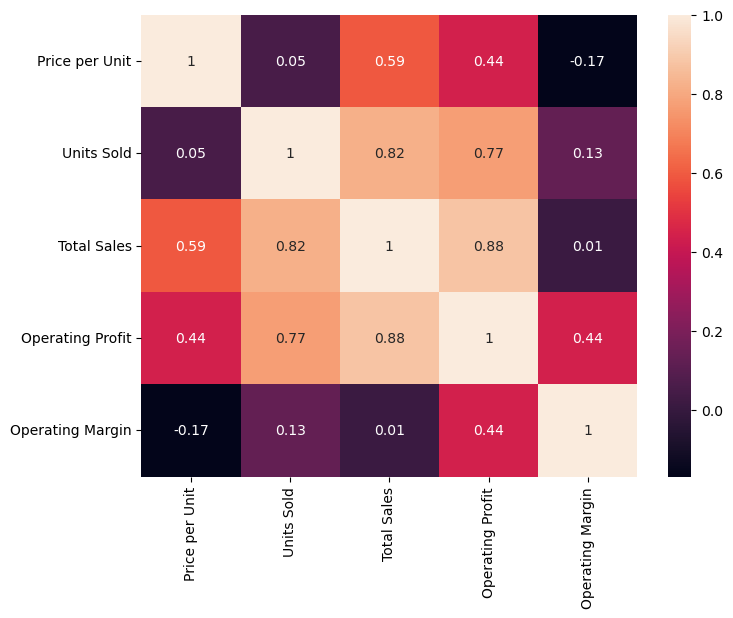

In [106]:
plt.figure(figsize=(8,6))
sns.heatmap(low_sales_numeric_df.corr().round(2),annot = True)
plt.show()

**Weaker overall correlations**

- Compared to high-sales data, the relationships between Units Sold, Total Sales, and Operating Profit are weaker and more scattered, indicating inconsistent performance in low-sales transactions.
- This suggests that low-volume transactions do not reliably convert into proportional profit.

**Limited impact of units sold**

- Units Sold shows only a moderate correlation with Total Sales, meaning that even selling more units doesn’t always translate to significant revenue gains — possibly due to lower prices or discounted margins.

# Linear Regression

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools import add_constant

In [108]:
corr_matrix = high_sales_numeric_df.corr()
corr_matrix["Total Sales"].sort_values(ascending=False)

Total Sales         1.000000
Operating Profit    0.932402
Units Sold          0.794692
Price per Unit      0.527145
Operating Margin   -0.076853
Name: Total Sales, dtype: float64

In [109]:
features = [ "Price per Unit", "Operating Margin"]

# subset of budget_df
X = high_sales_numeric_df[features]
X

,Price per Unit,Operating Margin
0,45.0,0.40
1,35.0,0.35
2,35.0,0.35
3,30.0,0.40
4,35.0,0.40
...,...,...
5403,50.0,0.28
5404,41.0,0.32
5405,41.0,0.37
5406,42.0,0.42


In [110]:
X_const = add_constant(X)
X_const

,const,Price per Unit,Operating Margin
0,1.0,45.0,0.40
1,1.0,35.0,0.35
2,1.0,35.0,0.35
3,1.0,30.0,0.40
4,1.0,35.0,0.40
...,...,...,...
5403,1.0,50.0,0.28
5404,1.0,41.0,0.32
5405,1.0,41.0,0.37
5406,1.0,42.0,0.42


In [111]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
vif_data


,feature,VIF
0,Price per Unit,1.001267
1,Operating Margin,1.001267


- since Operating Profit and Units Sold  and mileage features have VIF value greater than 5, we will drop all the features for our model

In [112]:
y = high_sales_numeric_df["Total Sales"]
y

0       11250.0
1        8750.0
2        8750.0
3       15000.0
4           0.0
         ...   
5403     3200.0
5404     4305.0
5405     7544.0
5406     2940.0
5407     2407.0
Name: Total Sales, Length: 5408, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [114]:
# split the data in training and test sample 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [115]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3623, 1785, 3623, 1785)

In [116]:
# create the instance of the model 

In [117]:
model = LinearRegression()

In [118]:
# fit the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [119]:
model.intercept_, model.coef_.round(2)

(np.float64(818.329288388124), array([  134.47, -2253.77]))

In [120]:
# model valuation 
y_pred = model.predict = model.predict(X_test)

In [121]:
y_test, y_pred

(4270     1131.0
 1615     1610.0
 1924     4611.0
 230     10788.0
 465      1392.0
          ...   
 540      7021.0
 1874     4459.0
 4606     8096.0
 5132      357.0
 2996     1175.0
 Name: Total Sales, Length: 1785, dtype: float64,
 array([3703.83087895, 1686.74468178, 7021.31976249, ..., 5563.15288203,
        2628.05157379, 3008.17703227]))

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [123]:
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
r_sq_score = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [124]:
print(f"mae:{mae}\nmse:{mse}:\nrmse:{rmse}\nr2_score:{r_sq_score}")

mae:2149.455607398737
mse:7610607.78498052:
rmse:2758.7330035689424
r2_score:0.2717466568382416


In [125]:
corr_matrix = low_sales_numeric_df.corr()
corr_matrix["Total Sales"].sort_values(ascending=False)

Total Sales         1.000000
Operating Profit    0.877147
Units Sold          0.818306
Price per Unit      0.591287
Operating Margin    0.013008
Name: Total Sales, dtype: float64

In [126]:
features = ["Price per Unit","Operating Margin"]

# subset of budget_df
X = low_sales_numeric_df[features]
X

,Price per Unit,Operating Margin
0,50.0,0.50
1,50.0,0.30
2,40.0,0.35
3,45.0,0.35
4,60.0,0.30
...,...,...
3108,65.0,0.25
3109,55.0,0.30
3110,55.0,0.35
3111,55.0,0.35


In [127]:
X_const = add_constant(X)
X_const

,const,Price per Unit,Operating Margin
0,1.0,50.0,0.50
1,1.0,50.0,0.30
2,1.0,40.0,0.35
3,1.0,45.0,0.35
4,1.0,60.0,0.30
...,...,...,...
3108,1.0,65.0,0.25
3109,1.0,55.0,0.30
3110,1.0,55.0,0.35
3111,1.0,55.0,0.35


In [128]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Price per Unit,1.029836
1,Operating Margin,1.029836


- since Operating Profit and Units Sold and mileage features have VIF value greater than 5, we will drop all the features for our model

In [129]:
y = low_sales_numeric_df["Total Sales"]
y

0       600000.0
1       500000.0
2       400000.0
3       382500.0
4       540000.0
          ...   
3108    130000.0
3109    165000.0
3110    316250.0
3111    123750.0
3112    123750.0
Name: Total Sales, Length: 3113, dtype: float64

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [131]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2085, 1028, 2085, 1028)

In [132]:
model = LinearRegression()

In [133]:
model.fit(X_train, y_train)

LinearRegression()

In [134]:
model.intercept_, model.coef_.round(2)

(np.float64(-118967.17243425472), array([  6047.23, 191795.74]))

In [135]:
y_pred = model.predict = model.predict(X_test)

In [136]:
y_test, y_pred

(1510    330000.0
 1068    137500.0
 567     292500.0
 2899    112500.0
 1467    202500.0
           ...   
 166     487500.0
 1268    420000.0
 2849    135000.0
 3097    225000.0
 1602    280000.0
 Name: Total Sales, Length: 1028, dtype: float64,
 array([320585.13445246, 261579.60632647, 350821.30215432, ...,
        210697.05773078, 392114.06394198, 199640.46364499]))

In [137]:
print(f"mae:{mae}\nmse:{mse}:\nrmse:{rmse}\nr2_score:{r_sq_score}")

mae:2149.455607398737
mse:7610607.78498052:
rmse:2758.7330035689424
r2_score:0.2717466568382416


# DT Classsifier

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42) 

In [139]:
len(X_train),len(X_test) 

(2085, 1028)

In [140]:
from sklearn.tree import DecisionTreeRegressor

In [141]:
model_gini= DecisionTreeRegressor(random_state= 42)

In [142]:
model_gini.fit(X_train , y_train) 

DecisionTreeRegressor(random_state=42)

In [143]:
y_pred_ent = model_gini.predict(X_test) 

In [144]:
from sklearn.metrics import  confusion_matrix, classification_report #(true,false)

In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_ent)
mse = mean_squared_error(y_test, y_pred_ent)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_ent)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 82946.56296882752
Mean Squared Error: 11520935546.969643
Root Mean Squared Error: 107335.6210536355
R² Score: 0.38783321172755614


# Clustering 

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [148]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [150]:
cluster_models = [KMeans(n_clusters=3,  random_state = 42), AgglomerativeClustering(n_clusters=3), DBSCAN()]

### for model in cluster_models:
    labels = model.fit_predict(X_scaled)
    print(f"{model}_labels_ = {labels}")


In [155]:
from sklearn.decomposition import PCA

In [156]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [158]:
len(X_pca), len(X_scaled)

(3113, 3113)

In [159]:
pca.components_

array([[-1.26147951,  1.06515982],
       [ 0.46877091, -0.66509059],
       [-0.46970492, -0.73844121],
       ...,
       [ 0.28916492,  0.02042862],
       [ 0.28916492,  0.02042862],
       [ 0.6483769 , -1.35060981]])

## KMeans

In [162]:
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans_labels = kmeans.fit_predict(X_scaled)

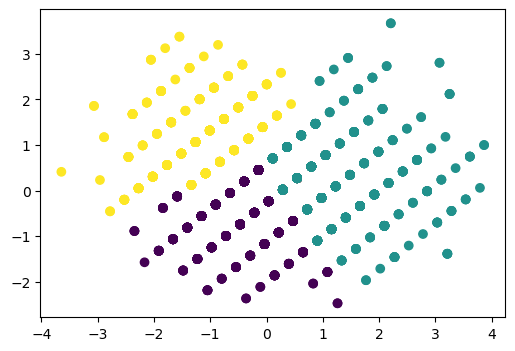

In [164]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0],X_pca[:,1], c= kmeans_labels )
plt.show()

## Agglomerative

In [165]:
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)

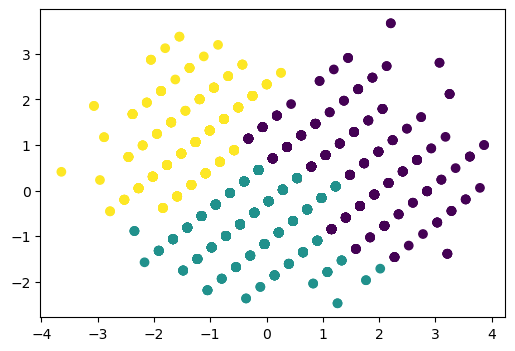

In [166]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0],X_pca[:,1], c= agg_labels )
plt.show()

## DBSCAN

In [168]:
dbscan = DBSCAN(eps=0.5)
dbscan_labels = dbscan.fit_predict(X_scaled)

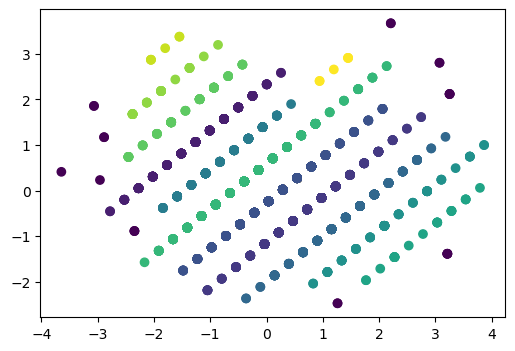

In [169]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0],X_pca[:,1], c= dbscan_labels )
plt.show()

# Bagging Regressor

In [171]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [172]:
X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)


In [182]:
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),  # Base estimator
    n_estimators=50,
    max_samples=0.7,  # Use 70% of the training data for each base estimator
    bootstrap=True,
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel processing
)

In [183]:
bagging_clf.fit(X_train_clf, y_train_clf)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                  max_samples=0.7, n_estimators=50, n_jobs=-1, random_state=42)

In [186]:
y_pred_clf = bagging_clf.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")


Bagging Classifier Accuracy: 0.8600
